# Word embedding visualizations per region

In [1]:
using Pkg
Pkg.activate(".")
#Pkg.add(["Plots", "CSV", "DataFrames", "SimilaritySearch", "TextSearch", "Formatting", "Latexify", "UMAP", "Glob"])
using Plots, JLD2, LinearAlgebra, Glob

  Activating project at `~/Research/RegionalSpanish/notebooks`


# Spanish language vocabulary visualization (UMAP) per region

2d and 3d projections, for spatial distribution and 3d to color distributions, respectively.
It computes UMAP using 15NN and cosine distance using regional embeddings.



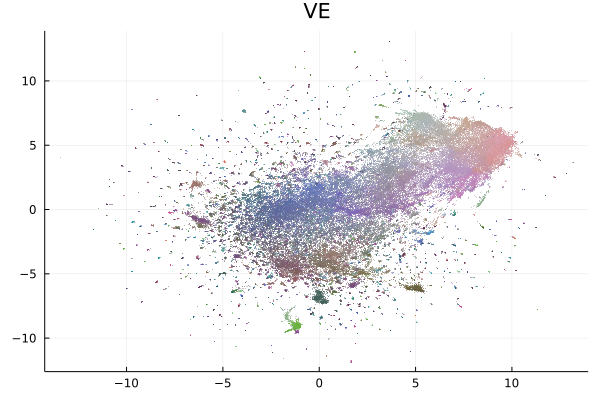

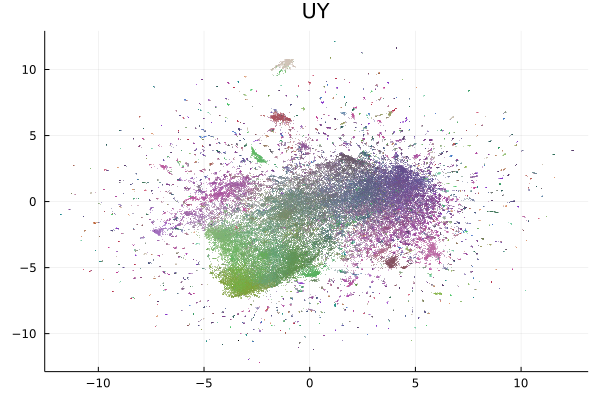

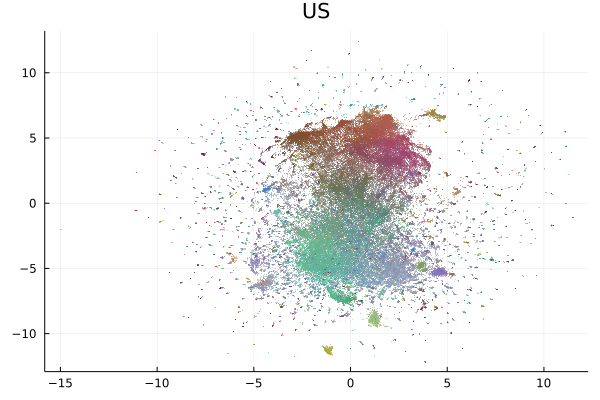

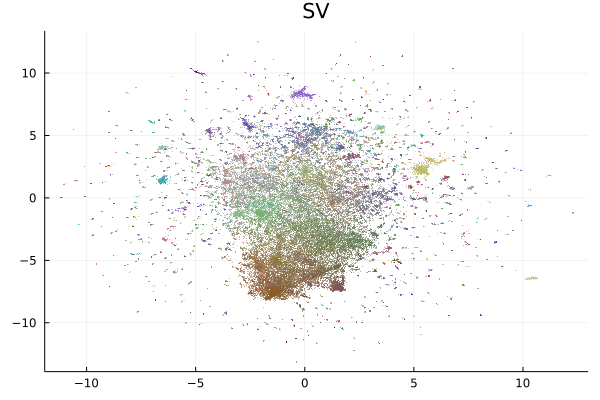

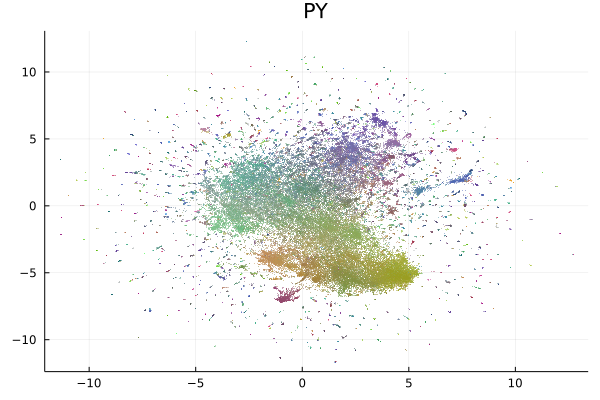

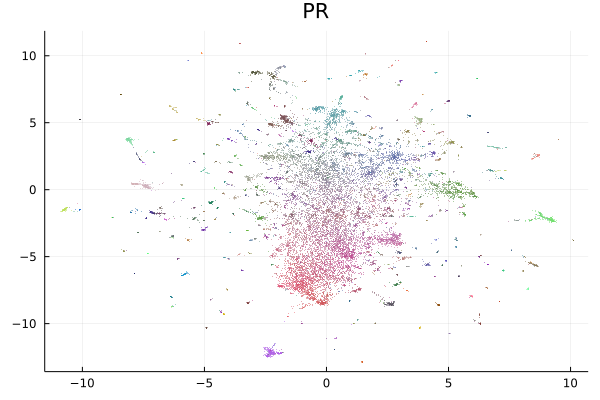

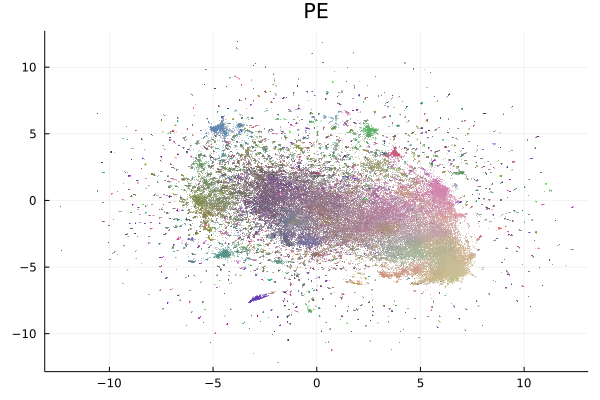

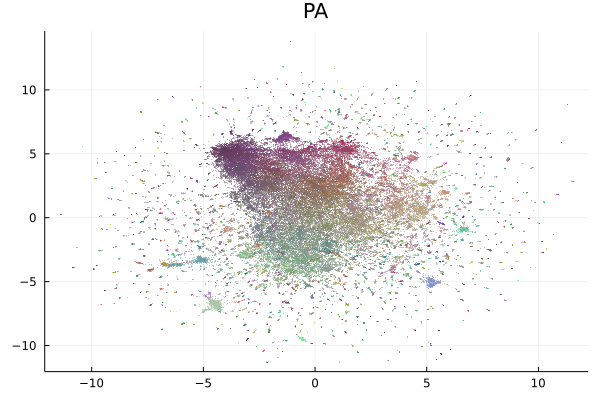

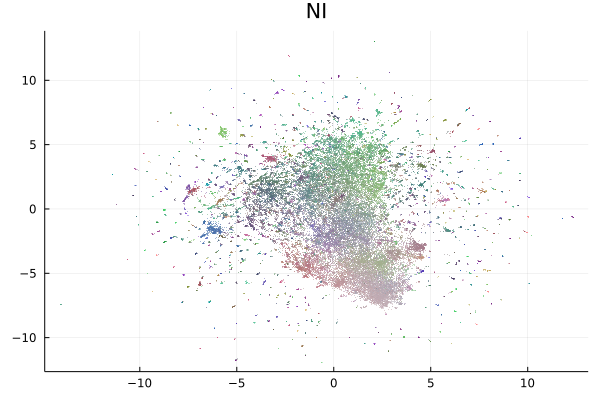

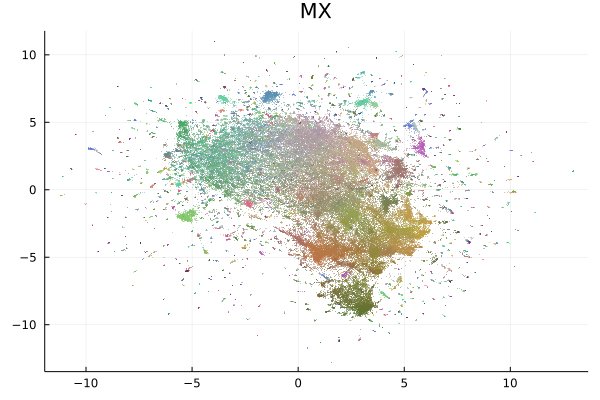

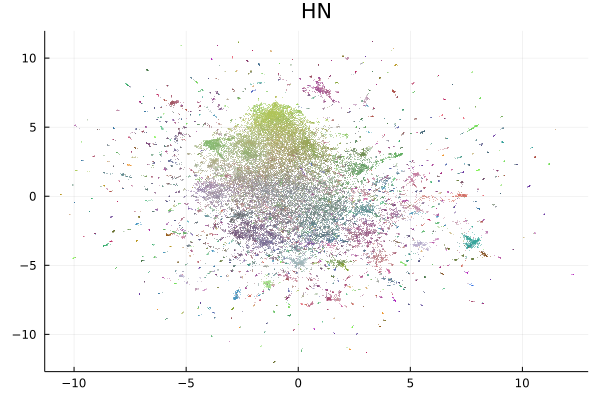

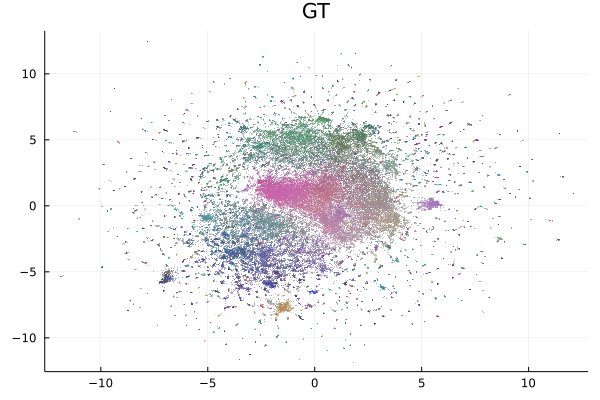

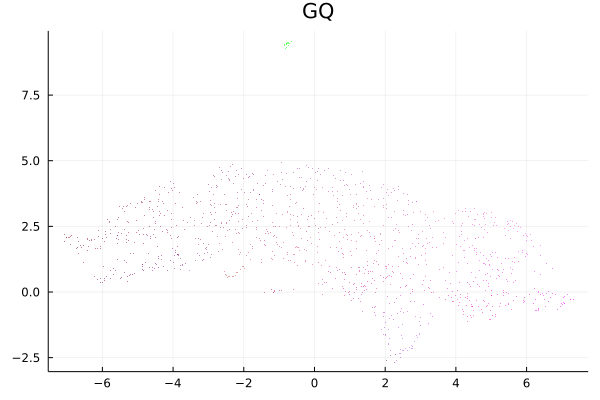

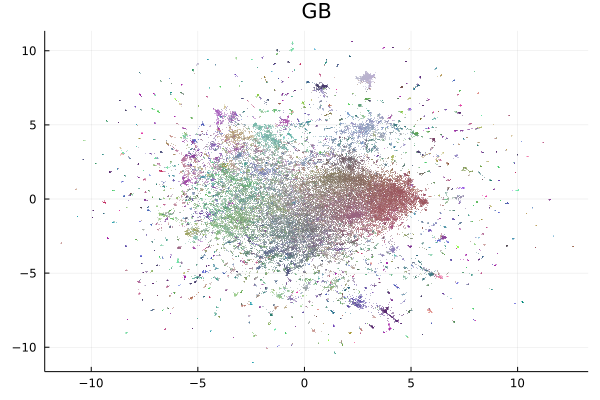

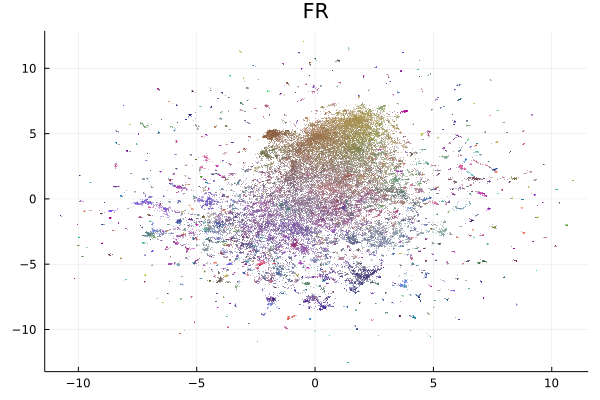

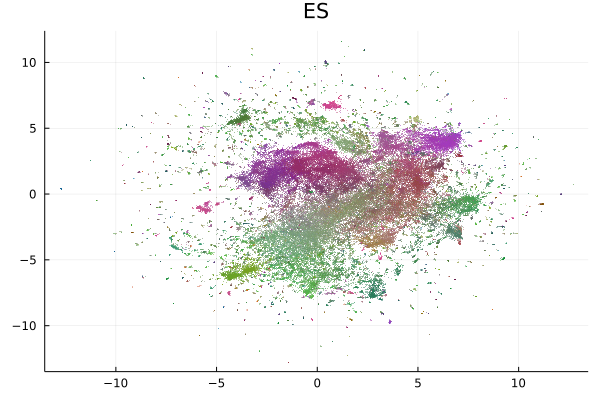

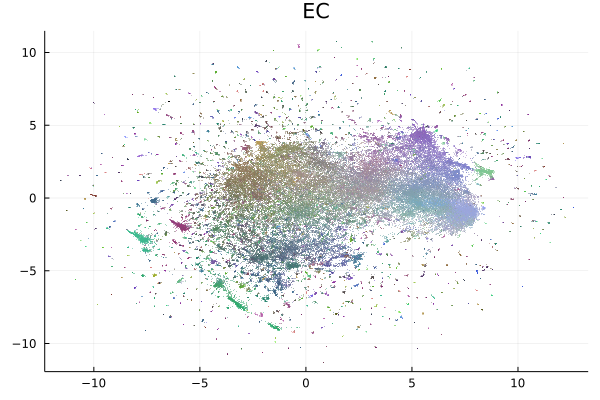

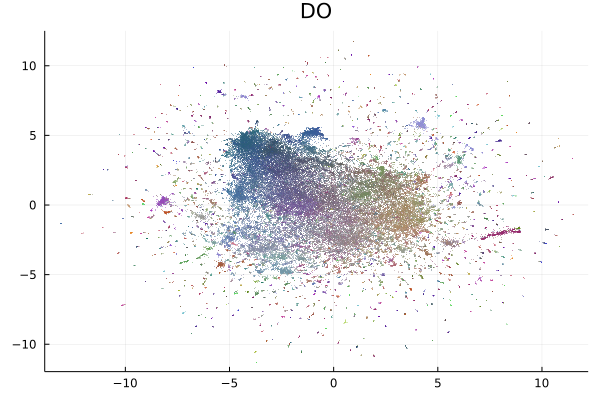

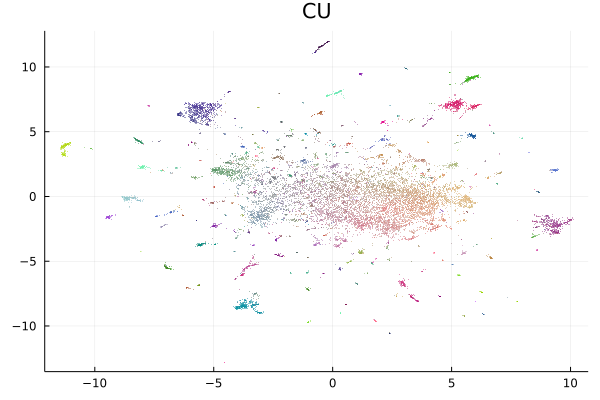

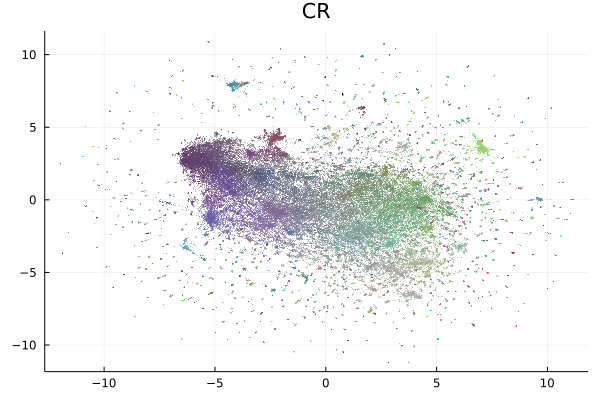

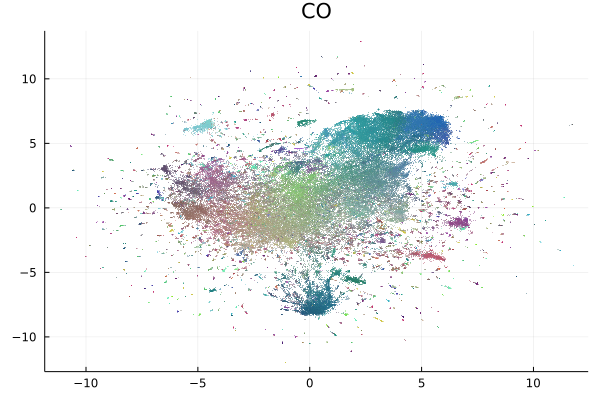

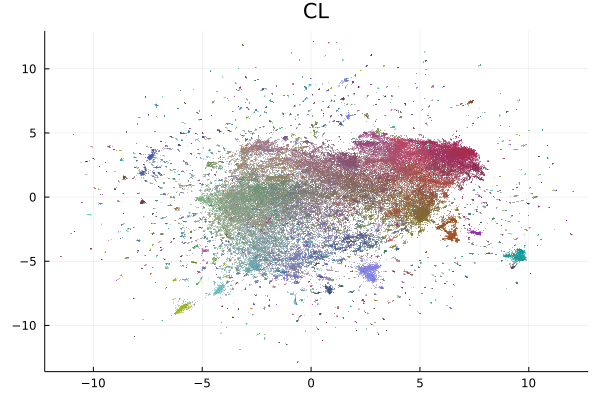

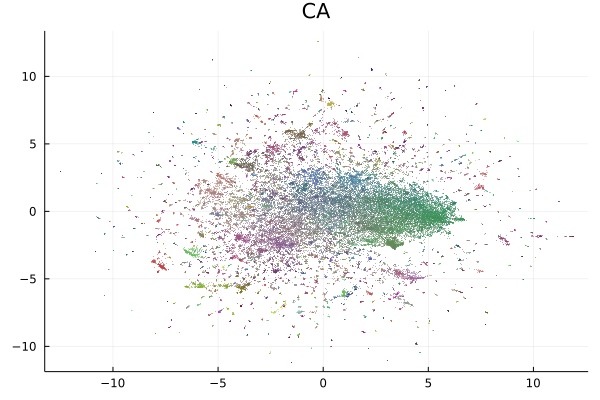

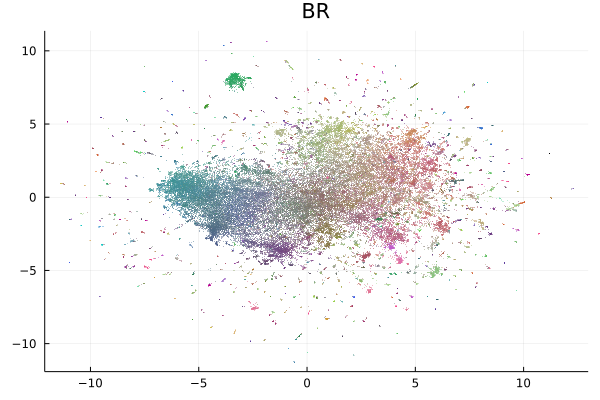

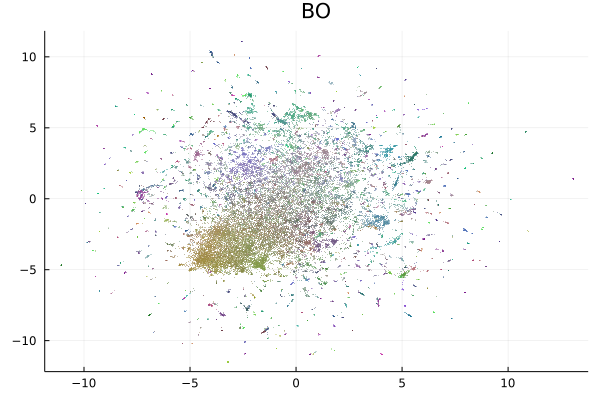

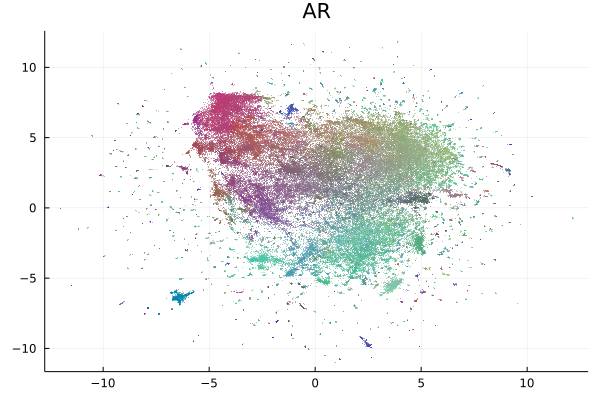

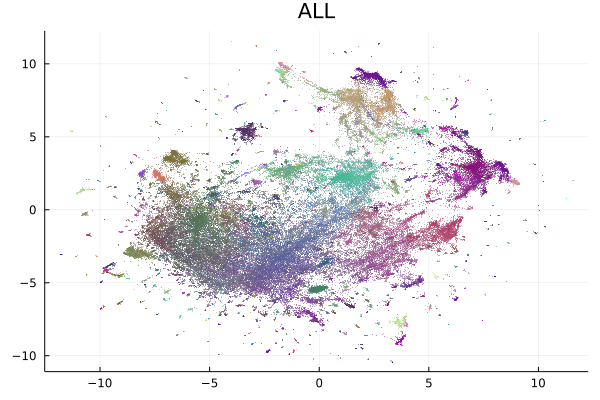

┌ Info: ../data/SpanishLang/embeddings/umap-embeddings-common-tokens-VE.jld2
└ @ Main In[3]:4
┌ Info: ../data/SpanishLang/embeddings/umap-embeddings-common-tokens-UY.jld2
└ @ Main In[3]:4
┌ Info: ../data/SpanishLang/embeddings/umap-embeddings-common-tokens-US.jld2
└ @ Main In[3]:4
┌ Info: ../data/SpanishLang/embeddings/umap-embeddings-common-tokens-SV.jld2
└ @ Main In[3]:4
┌ Info: ../data/SpanishLang/embeddings/umap-embeddings-common-tokens-PY.jld2
└ @ Main In[3]:4
┌ Info: ../data/SpanishLang/embeddings/umap-embeddings-common-tokens-PR.jld2
└ @ Main In[3]:4
┌ Info: ../data/SpanishLang/embeddings/umap-embeddings-common-tokens-PE.jld2
└ @ Main In[3]:4
┌ Info: ../data/SpanishLang/embeddings/umap-embeddings-common-tokens-PA.jld2
└ @ Main In[3]:4
┌ Info: ../data/SpanishLang/embeddings/umap-embeddings-common-tokens-NI.jld2
└ @ Main In[3]:4
┌ Info: ../data/SpanishLang/embeddings/umap-embeddings-common-tokens-MX.jld2
└ @ Main In[3]:4
┌ Info: ../data/SpanishLang/embeddings/umap-embeddings-commo

In [3]:
files = reverse!(glob("../data/SpanishLang/embeddings/umap-embeddings-common-tokens-*.jld2"))

for filename in files
    @info filename
    X, C = load(filename, "e2", "e3")

    for i in (1, 2, 3)
        min_, max_ = extrema(C[i, :])
        # @info i => (min_, max_)
        for j in 1:size(C, 2)
            C[i, j] = (C[i, j] - min_) / (max_ - min_)
        end
    end
    
    C = [RGB(c...) for c in eachcol(C)]

    title = last(split(replace(basename(filename), ".jld2" => ""), '-'))
    # scatter(X[1, :], X[2, :], c=C, label="", series_annotations=text.(cclist, :bottom), ms=6, ma=0.7, title=title)
    display(scatter(X[1, :], X[2, :], c=C, label="", ma=0.5, ms=1, fa=0.5, la=0.5, alpha=0.5, title=title, fmt=:png))
end